In [21]:
!pip install catboost
!pip install pandas-profiling==3.1.0
!pip install pycaret
!pip install optuna
!pip install scikit-learn==0.23.2
!pip install missingpy

     |████████████████████████████████| 261 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 66.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 85.1 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 21.0 MB/s ta 0:00:01
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0


  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.3.0
    Uninstalling pandas-profiling-3.3.0:
      Successfully uninstalled pandas-profiling-3.3.0


     |████████████████████████████████| 58.1 MB 40.9 MB/s eta 0:00:01


  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scipy<=1.5.4, but you have scipy 1.9.1 which is incompatible.
     |████████████████████████████████| 49 kB 7.4 MB/s eta 0:00:011


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train_clean_fin.csv')

In [4]:
df = df.drop(['Unnamed: 0', 'product_id'], axis =1)
df.head()

,gender,Age,loan_limit,loan_rate,credit_score,yearly_income,label_income_type,label_employment_type,label_houseown_type,label_purpose,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,work_day,is_applied
0,1.0,34.0,30000000.0,10.6,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
1,1.0,34.0,35000000.0,12.4,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
2,1.0,34.0,9000000.0,6.7,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
3,1.0,34.0,15000000.0,6.7,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
4,1.0,34.0,30000000.0,8.6,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0


In [134]:
neg, pos = np.bincount(df['is_applied'])
total = neg + pos

print(f'[데이터] \n전체: {total}개 \n대출 예측: {pos}개 (전체의 {round((100 * pos/ total), 2)}%)\n')

[데이터] 
전체: 952218개 
대출 예측: 37306개 (전체의 3.92%)



In [6]:
df.head()

,gender,Age,loan_limit,loan_rate,credit_score,yearly_income,label_income_type,label_employment_type,label_houseown_type,label_purpose,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,work_day,is_applied
0,1.0,34.0,30000000.0,10.6,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
1,1.0,34.0,35000000.0,12.4,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
2,1.0,34.0,9000000.0,6.7,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
3,1.0,34.0,15000000.0,6.7,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0
4,1.0,34.0,30000000.0,8.6,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365,0.0


In [7]:
df_y = df['is_applied']
df_X = df.drop(labels = 'is_applied', axis = 1)
print(np.unique(df_y, return_counts = True))
df_X.head()

(array([0., 1.]), array([914912,  37306]))


,gender,Age,loan_limit,loan_rate,credit_score,yearly_income,label_income_type,label_employment_type,label_houseown_type,label_purpose,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,work_day
0,1.0,34.0,30000000.0,10.6,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365
1,1.0,34.0,35000000.0,12.4,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365
2,1.0,34.0,9000000.0,6.7,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365
3,1.0,34.0,15000000.0,6.7,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365
4,1.0,34.0,30000000.0,8.6,650.0,35000000.0,0,3,3,3,45000000.0,0.0,0.0,1.0,35000000.0,365


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, stratify = df_y, random_state = 0)

print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))
print(X_train.shape, y_test.shape)

(array([0., 1.]), array([731929,  29845]))
(array([0., 1.]), array([182983,   7461]))
(761774, 16) (190444,)


In [9]:
from numpy import mean, std
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Cost-sensitive learning 적용하지 않은 RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, max_depth = 8, random_state = 0, max_features = 10, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=10, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [11]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

proba_train = rf.predict_proba(X_train)
proba_test = rf.predict_proba(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
confusion_matrix(y_test, pred_test)

array([[182973,     10],
       [  7449,     12]])

In [ ]:
# Cost-sensitive learning 적용한 RandomForestClassifier

In [14]:
weights = {0:1.0, 1:10.0}
rf = RandomForestClassifier(n_estimators = 500, max_depth = 8, random_state = 0, max_features = 10,
                           n_jobs = -1, class_weight = weights)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0, 1: 10.0}, max_depth=8,
                       max_features=10, n_estimators=500, n_jobs=-1,
                       random_state=0)

In [15]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

proba_train = rf.predict_proba(X_train)
proba_test = rf.predict_proba(X_test)

In [16]:
confusion_matrix(y_test, pred_test)

array([[166582,  16401],
       [  3223,   4238]])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952218 entries, 0 to 952217
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   gender                               952218 non-null  float64
 1   Age                                  952218 non-null  float64
 2   loan_limit                           952218 non-null  float64
 3   loan_rate                            952218 non-null  float64
 4   credit_score                         952218 non-null  float64
 5   yearly_income                        952218 non-null  float64
 6   label_income_type                    952218 non-null  int64  
 7   label_employment_type                952218 non-null  int64  
 8   label_houseown_type                  952218 non-null  int64  
 9   label_purpose                        952218 non-null  int64  
 10  desired_amount                       952218 non-null  float64
 11  personal_reha

In [24]:
import pandas as pd
import numpy as np
import warnings

from missingpy import MissForest
from sklearn.metrics import f1_score, recall_score, precision_score
import optuna
from optuna.samplers import TPESampler
from sklearn.neighbors import KNeighborsClassifier

In [25]:
df['is_applied'] = df['is_applied'].astype("category")
cat_cols = [df.columns.get_loc(col) for col in df.select_dtypes(['category']).columns.tolist()]

In [26]:
imputer = MissForest(max_iter=10, n_estimators=28462, random_state=42)
df_imputed = imputer.fit_transform(df, cat_vars=cat_cols)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns, index=df.index)

/Users/seonghyeonma/opt/anaconda3/lib/python3.8/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


# SMOTE 기법

In [ ]:
!pip install imblearn

In [27]:
import matplotlib.pyplot as plt

In [28]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot

In [29]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=0, n=914912 (50.000%)
Class=1, n=914912 (50.000%)


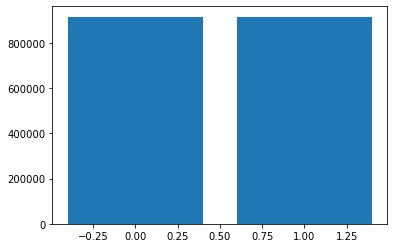

In [30]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state = 0).fit_resample(df_X, df_y)
count_and_plot(y_resampled)

In [43]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis= 1)

#### 기타

In [44]:
X = train[['gender', 'Age', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income', 'label_income_type',
       'label_employment_type', 'label_houseown_type', 'label_purpose',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt','work_day']]
y = train['is_applied']

In [45]:
from imblearn.combine import SMOTETomek
X_resampled, y_resampled = SMOTETomek(random_state=42).fit_resample(X, y)

In [46]:
X_resampled

,gender,Age,loan_limit,loan_rate,credit_score,yearly_income,label_income_type,label_employment_type,label_houseown_type,label_purpose,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,work_day
0,0.000000,34.000000,9.000000e+06,7.500000,590.000000,3.500000e+07,0,3,3,3,1.000000e+07,0.0,0.0,1.0,1.700000e+07,2312
1,1.000000,29.000000,4.000000e+07,11.900000,820.000000,2.700000e+07,0,0,3,1,1.000000e+08,0.0,0.0,1.0,2.600000e+07,426
2,1.000000,54.000000,5.000000e+06,5.900000,730.000000,3.700000e+07,0,3,2,1,3.500000e+07,0.0,0.0,1.0,3.600000e+07,151
3,1.000000,36.000000,1.500000e+07,14.200000,550.000000,3.000000e+07,0,3,3,1,5.000000e+06,0.0,0.0,1.0,2.000000e+06,243
4,1.000000,28.000000,9.000000e+06,14.600000,720.000000,3.500000e+07,0,0,3,1,1.400000e+07,0.0,0.0,1.0,1.100000e+07,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445541,1.000000,26.000000,1.100000e+07,6.700745,630.000000,2.000000e+06,1,0,0,3,1.000000e+06,0.0,0.0,1.0,4.000000e+06,365
1445542,1.000000,49.917630,1.200000e+07,7.325449,516.272437,2.037276e+07,0,1,3,2,4.627244e+06,0.0,0.0,1.0,1.362724e+07,674
1445543,1.000000,35.699419,4.234971e+07,7.571967,726.994188,4.343353e+07,0,3,1,1,2.956647e+07,0.0,0.0,1.0,2.349709e+06,799
1445544,1.000000,24.688447,1.200000e+07,5.576096,670.000000,3.061594e+07,0,3,1,3,8.000000e+06,0.0,0.0,1.0,8.000000e+06,212


In [47]:
X_resampled['is_applied'] = y_resampled

In [50]:
X_train = X_resampled.drop(columns=['is_applied'])
X_train = X_train[['gender', 'Age', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income', 'label_income_type',
       'label_employment_type', 'label_houseown_type', 'label_purpose',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt','work_day']]
y_train = X_resampled['is_applied']


X_test = X_test[['gender', 'Age', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income', 'label_income_type',
       'label_employment_type', 'label_houseown_type', 'label_purpose',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt','work_day']]
y_test = test['is_applied']

In [51]:
import os
import sys
import platform
import random
import math
from typing import List ,Dict, Tuple

import pandas as pd
import numpy as np
import optuna 
from sklearn.model_selection import StratifiedKFold , KFold
import sklearn 
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 
from sklearn.model_selection import train_test_split

from catboost import Pool,CatBoostClassifier
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import f1_score, recall_score, precision_score
import optuna
from optuna.samplers import TPESampler
from sklearn.neighbors import KNeighborsClassifier

In [52]:
sampler = TPESampler(seed=42)

def objective(trial):    
    params = {
        'n_neighbors':trial.suggest_int("n_neighbors", 1, 60),
        'weights': trial.suggest_categorical('weights', ["uniform", "distance"]),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size':trial.suggest_int("leaf_size", 30, 60),
        'p': trial.suggest_categorical('p', [1, 2]),
        'n_jobs': -1,
        

    }
    
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)
    
    y_valid_pred = model.predict(X_test)
    return f1_score(y_test, y_valid_pred, average="macro")

In [56]:
train_df = train 
test_df = test
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761774 entries, 440579 to 911930
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   gender                               761774 non-null  float64
 1   Age                                  761774 non-null  float64
 2   loan_limit                           761774 non-null  float64
 3   loan_rate                            761774 non-null  float64
 4   credit_score                         761774 non-null  float64
 5   yearly_income                        761774 non-null  float64
 6   label_income_type                    761774 non-null  int64  
 7   label_employment_type                761774 non-null  int64  
 8   label_houseown_type                  761774 non-null  int64  
 9   label_purpose                        761774 non-null  int64  
 10  desired_amount                       761774 non-null  float64
 11  personal

In [58]:
train_df = train_df.astype('int64')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761774 entries, 440579 to 911930
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   gender                               761774 non-null  int64
 1   Age                                  761774 non-null  int64
 2   loan_limit                           761774 non-null  int64
 3   loan_rate                            761774 non-null  int64
 4   credit_score                         761774 non-null  int64
 5   yearly_income                        761774 non-null  int64
 6   label_income_type                    761774 non-null  int64
 7   label_employment_type                761774 non-null  int64
 8   label_houseown_type                  761774 non-null  int64
 9   label_purpose                        761774 non-null  int64
 10  desired_amount                       761774 non-null  int64
 11  personal_rehabilitation_yn        

In [59]:
test_df = test_df.astype('int64')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190444 entries, 124352 to 738063
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   gender                               190444 non-null  int64
 1   Age                                  190444 non-null  int64
 2   loan_limit                           190444 non-null  int64
 3   loan_rate                            190444 non-null  int64
 4   credit_score                         190444 non-null  int64
 5   yearly_income                        190444 non-null  int64
 6   label_income_type                    190444 non-null  int64
 7   label_employment_type                190444 non-null  int64
 8   label_houseown_type                  190444 non-null  int64
 9   label_purpose                        190444 non-null  int64
 10  desired_amount                       190444 non-null  int64
 11  personal_rehabilitation_yn        

In [60]:
train_X, train_y = train_df.drop('is_applied', axis=1), train_df['is_applied']
print(train_X.shape, train_y.shape)

(761774, 16) (761774,)


In [61]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(train_X), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")

In [ ]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)

In [ ]:
def f1(y, y_pred):
    accuracy = np.mean(np.equal(y,y_pred))
    right = np.sum(y * y_pred == 1)
    precision = right / np.sum(y_pred)
    recall = right / np.sum(y_pred)
    f1 = 2 * precision*recall/(precision+recall)
    return f1

accuracy = np.mean(np.equal(y,p))

right = np.sum(y * p == 1)

precision = right / np.sum(p)

recall = right / np.sum(y)

f1 = 2 * precision*recall/(precision+recall)
from sklearn.metrics import *

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}, f1:{}'.format(accuracy, precision, recall))

In [67]:
models = []
scores = []
for model in [reg, ridge, lasso, Enet, DTree, rf, model_xgb]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|████| 10/10 [00:13<00:00,  1.31s/it]


1 FOLDS: LinearRegression RMSLE: 0.1894
2 FOLDS: LinearRegression RMSLE: 0.1875
3 FOLDS: LinearRegression RMSLE: 0.1894
4 FOLDS: LinearRegression RMSLE: 0.1861
5 FOLDS: LinearRegression RMSLE: 0.1900
6 FOLDS: LinearRegression RMSLE: 0.1880
7 FOLDS: LinearRegression RMSLE: 0.1912
8 FOLDS: LinearRegression RMSLE: 0.1879
9 FOLDS: LinearRegression RMSLE: 0.1883
10 FOLDS: LinearRegression RMSLE: 0.1883

LinearRegression mean RMSLE: 0.1886


Ridge Cross Validations...:   0%|                        | 0/10 [00:00<?, ?it/s]/Users/seonghyeonma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51379e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
Ridge Cross Validations...:  10%|█▌              | 1/10 [00:00<00:02,  3.16it/s]/Users/seonghyeonma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.52633e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/seonghyeonma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00159e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
Ridge Cross Validations...:  30%|████▊           | 3/10 [00:00<00:01,  6.80it/s]/Users/seonghyeonma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear

1 FOLDS: Ridge RMSLE: 0.1894
2 FOLDS: Ridge RMSLE: 0.1875
3 FOLDS: Ridge RMSLE: 0.1894
4 FOLDS: Ridge RMSLE: 0.1861
5 FOLDS: Ridge RMSLE: 0.1900
6 FOLDS: Ridge RMSLE: 0.1880
7 FOLDS: Ridge RMSLE: 0.1912
8 FOLDS: Ridge RMSLE: 0.1879
9 FOLDS: Ridge RMSLE: 0.1883
10 FOLDS: Ridge RMSLE: 0.1883

Ridge mean RMSLE: 0.1886


Lasso Cross Validations...: 100%|███████████████| 10/10 [00:02<00:00,  3.64it/s]


1 FOLDS: Lasso RMSLE: 0.1898
2 FOLDS: Lasso RMSLE: 0.1879
3 FOLDS: Lasso RMSLE: 0.1898
4 FOLDS: Lasso RMSLE: 0.1866
5 FOLDS: Lasso RMSLE: 0.1905
6 FOLDS: Lasso RMSLE: 0.1884
7 FOLDS: Lasso RMSLE: 0.1917
8 FOLDS: Lasso RMSLE: 0.1884
9 FOLDS: Lasso RMSLE: 0.1888
10 FOLDS: Lasso RMSLE: 0.1887

Lasso mean RMSLE: 0.1891


ElasticNet Cross Validations...: 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


1 FOLDS: ElasticNet RMSLE: 0.1894
2 FOLDS: ElasticNet RMSLE: 0.1875
3 FOLDS: ElasticNet RMSLE: 0.1894
4 FOLDS: ElasticNet RMSLE: 0.1861
5 FOLDS: ElasticNet RMSLE: 0.1900
6 FOLDS: ElasticNet RMSLE: 0.1880
7 FOLDS: ElasticNet RMSLE: 0.1913
8 FOLDS: ElasticNet RMSLE: 0.1880
9 FOLDS: ElasticNet RMSLE: 0.1883
10 FOLDS: ElasticNet RMSLE: 0.1883

ElasticNet mean RMSLE: 0.1886


DecisionTreeRegressor Cross Validations...: 100%|█| 10/10 [00:11<00:00,  1.13s/i


1 FOLDS: DecisionTreeRegressor RMSLE: 0.1869
2 FOLDS: DecisionTreeRegressor RMSLE: 0.1835
3 FOLDS: DecisionTreeRegressor RMSLE: 0.1860
4 FOLDS: DecisionTreeRegressor RMSLE: 0.1832
5 FOLDS: DecisionTreeRegressor RMSLE: 0.1864
6 FOLDS: DecisionTreeRegressor RMSLE: 0.1835
7 FOLDS: DecisionTreeRegressor RMSLE: 0.1875
8 FOLDS: DecisionTreeRegressor RMSLE: 0.1839
9 FOLDS: DecisionTreeRegressor RMSLE: 0.1845
10 FOLDS: DecisionTreeRegressor RMSLE: 0.1837

DecisionTreeRegressor mean RMSLE: 0.1849


RandomForestRegressor Cross Validations...: 100%|█| 10/10 [25:39<00:00, 153.96s/


1 FOLDS: RandomForestRegressor RMSLE: 0.1835
2 FOLDS: RandomForestRegressor RMSLE: 0.1802
3 FOLDS: RandomForestRegressor RMSLE: 0.1824
4 FOLDS: RandomForestRegressor RMSLE: 0.1796
5 FOLDS: RandomForestRegressor RMSLE: 0.1826
6 FOLDS: RandomForestRegressor RMSLE: 0.1806
7 FOLDS: RandomForestRegressor RMSLE: 0.1836
8 FOLDS: RandomForestRegressor RMSLE: 0.1805
9 FOLDS: RandomForestRegressor RMSLE: 0.1809
10 FOLDS: RandomForestRegressor RMSLE: 0.1803

RandomForestRegressor mean RMSLE: 0.1814


XGBRegressor Cross Validations...: 100%|███████| 10/10 [20:05<00:00, 120.58s/it]

1 FOLDS: XGBRegressor RMSLE: 0.1897
2 FOLDS: XGBRegressor RMSLE: 0.1877
3 FOLDS: XGBRegressor RMSLE: 0.1844
4 FOLDS: XGBRegressor RMSLE: 0.1805
5 FOLDS: XGBRegressor RMSLE: 0.1822
6 FOLDS: XGBRegressor RMSLE: 0.1801
7 FOLDS: XGBRegressor RMSLE: 0.1813
8 FOLDS: XGBRegressor RMSLE: 0.1778
9 FOLDS: XGBRegressor RMSLE: 0.1767
10 FOLDS: XGBRegressor RMSLE: 0.1755

XGBRegressor mean RMSLE: 0.1816


In [68]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,0.188619
1,Ridge,0.188619
2,Lasso,0.189071
3,ElasticNet,0.188634
4,DecisionTreeRegressor,0.184909
5,RandomForestRegressor,0.181419
6,XGBRegressor,0.181584


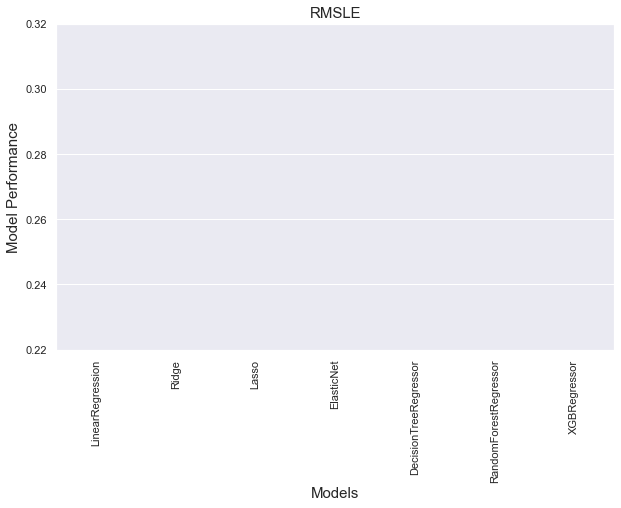

In [70]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.22, 0.32)
plt.title('RMSLE', fontsize=15)
plt.show()

In [71]:
cut = int(len(train_df)*0.8)
h_train = train_df[:cut]
h_valid = train_df[cut:]

h_train_X = h_train.drop('is_applied', axis=1)
h_train_y = h_train['is_applied']
h_valid_X = h_valid.drop('is_applied', axis=1)
h_valid_y = h_valid['is_applied']
print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

(609419, 16) (609419,) (152355, 16) (152355,)


In [80]:
h_train_X.head()

,gender,Age,loan_limit,loan_rate,credit_score,yearly_income,label_income_type,label_employment_type,label_houseown_type,label_purpose,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,work_day
440579,0,34,9000000,7,590,35000000,0,3,3,3,10000000,0,0,1,17000000,2312
814428,1,29,40000000,11,820,27000000,0,0,3,1,100000000,0,0,1,26000000,426
518522,1,54,5000000,5,730,37000000,0,3,2,1,35000000,0,0,1,36000000,151
266442,1,36,15000000,14,550,30000000,0,3,3,1,5000000,0,0,1,2000000,243
256707,1,28,9000000,14,720,35000000,0,0,3,1,14000000,0,0,1,11000000,92


In [90]:
h_train = pd.concat([h_train_X, h_train_y], axis = 1)
h_valid = pd.concat([h_valid_X, h_valid_y], axis= 1)

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")

In [151]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
    #dtrain = rf.df(h_train_X, label=h_train_y)
    #dtest = rf.df(h_valid_X, label=h_valid_y)
   
    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = RandomForestRegressor(**param)
    rf_model = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(h_valid_y, rf_model.predict(h_valid_X))
    return rmse

In [ ]:
sampler = TPESampler(seed=42)

def objective(trial):    
    params = {
        'n_neighbors':trial.suggest_int("n_neighbors", 1, 60),
        'weights': trial.suggest_categorical('weights', ["uniform", "distance"]),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size':trial.suggest_int("leaf_size", 30, 60),
        'p': trial.suggest_categorical('p', [1, 2]),
        'n_jobs': -1,
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),

        

    }
    
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)
    
    y_valid_pred = model.predict(X_valid)
    return f1_score(y_valid, y_valid_pred, average="macro")

In [ ]:
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=50)

In [ ]:
best_model = study.best_trial
best_params = best_model.params

print("Best model:")
print("  F1-score: {}".format(round(best_model.value, 4)))
print("  params  : {}".format(best_params))

In [29]:
SEED = 42
patience = 50

In [31]:
X_resampled

,gender,Age,loan_limit,loan_rate,credit_score,yearly_income,label_income_type,label_employment_type,label_houseown_type,label_purpose,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,work_day
0,1.000000,34.000000,3.000000e+07,10.600000,650.000000,3.500000e+07,0,3,3,3,4.500000e+07,0.0,0.0,1.0,3.500000e+07,365
1,1.000000,34.000000,3.500000e+07,12.400000,650.000000,3.500000e+07,0,3,3,3,4.500000e+07,0.0,0.0,1.0,3.500000e+07,365
2,1.000000,34.000000,9.000000e+06,6.700000,650.000000,3.500000e+07,0,3,3,3,4.500000e+07,0.0,0.0,1.0,3.500000e+07,365
3,1.000000,34.000000,1.500000e+07,6.700000,650.000000,3.500000e+07,0,3,3,3,4.500000e+07,0.0,0.0,1.0,3.500000e+07,365
4,1.000000,34.000000,3.000000e+07,8.600000,650.000000,3.500000e+07,0,3,3,3,4.500000e+07,0.0,0.0,1.0,3.500000e+07,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808791,1.000000,29.000000,1.100000e+07,6.840912,590.000000,1.500000e+07,1,0,0,3,1.000000e+06,0.0,0.0,1.0,1.000000e+06,182
1808792,1.000000,28.000000,7.000000e+06,6.500000,630.000000,3.000000e+06,1,3,0,3,1.000000e+07,0.0,0.0,1.0,3.000000e+07,669
1808793,1.000000,24.924175,4.169194e+07,8.886024,832.274757,3.415403e+07,1,1,2,3,3.308058e+06,0.0,0.0,1.0,0.000000e+00,758
1808794,1.000000,32.819467,1.407450e+07,14.604296,641.605914,4.200000e+07,0,2,0,3,1.000000e+07,0.0,0.0,1.0,1.307450e+07,151


In [30]:
X = X_resampled[['gender', 'Age', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income', 'label_income_type',
       'label_employment_type', 'label_houseown_type', 'label_purpose',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt','work_day']]
y = X_resampled[['is_applied']]

KeyError: "None of [Index(['is_applied'], dtype='object')] are in the [columns]"

In [ ]:
model = KNeighborsClassifier(**best_params)
model.fit(X, y)

In [ ]:
test = pd.read_csv(path + "test.csv")
X_test = test.drop(columns=['ID'])
X_test = X_test[['V3', 'V7', 'V10', 'V14', 'V17', 'V16']]
y_test_pred = model.predict(X_test)

In [32]:
# 파이프라인

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

order = [
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(order, verbose = True)
print(pipeline.steps)

[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())]


In [ ]:
# 그리드서치

from sklearn.model_selection import GridSearchCV

param = {
    "knn__n_neighbors":range(1, 11),
    "knn__p":[1,2]
}
gs = GridSearchCV(pipeline, param, scoring = 'accuracy', cv = 5, n_jobs = -1)
gs.fit(X_train, y_train)

In [ ]:
# 모델 평가

from sklearn.metrics import confusion_matrix, classification_matrix

confusion_matrix(y_test, pred_test)